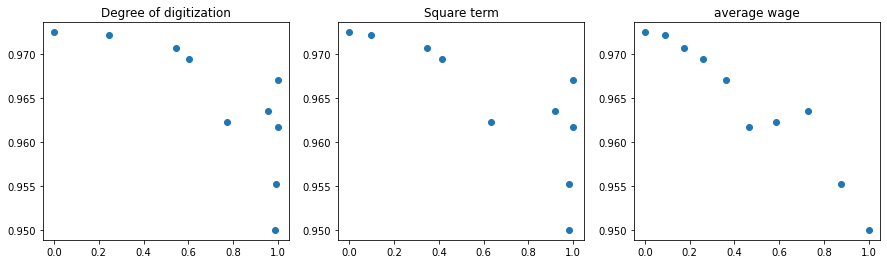

[0.97256194]
[[ 0.00758958 -0.00807999 -0.01727656]]


In [1]:
import numpy as np 
import pandas as pd 

data = pd.read_excel("劳动.xls")                 #导入数据集
x_train = data[["数字化程度","数字化程度（平方）","平均工资"]]
y_train = data[["就业率"]]

from sklearn.preprocessing import MinMaxScaler   #数据中心化
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)

def c_vector(x):                                 #提取第x列的数值，将所有特征归为一个向量，为一个个体
    c = []
    for i in range(len(x_train_scaled)):
        c.append(x_train_scaled[i][x-1])
    return np.array(c)


import matplotlib.pyplot as plt                 #绘制散点图

x_1 = c_vector(1)
x_2 = c_vector(2)
x_3 = c_vector(3)
y = data[["就业率"]]

fig ,ax = plt.subplots(1,3,figsize=(15,4))

ax[0].scatter(x_1,y)
ax[0].title.set_text('Degree of digitization')
ax[1].scatter(x_2,y)
ax[1].title.set_text("Square term")
ax[2].scatter(x_3,y)
ax[2].title.set_text("average wage")
plt.show()

from sklearn import linear_model                  #模型拟合

model = linear_model.LinearRegression()
model.fit(x_train_scaled[0:9],y_train[0:9])
print(model.intercept_)
print(model.coef_)
y_pre = model.predict(x_train_scaled[-1].reshape(1,-1))              
p_t = np.exp(y_pre)/(1+np.exp(y_pre))              #对2020年就业率作预测

y_pre = model.predict(x_train_scaled)[0:9].reshape(1,9)[0]
y_value = np.array(y_train)[0:9].reshape(1,-1)[0]
sse = np.dot((y_pre-y_value),(y_pre-y_value))
mse = np.sqrt(sse/(len(y_pre)-1))

In [2]:
def t_test(model,x):          #传入的参数有整个模型，样本解释变量(最后给出每个系数的p值)
    from scipy.stats import t 
    β = model.coef_[0]
    n = len(x)
    t_dist = t(n-1)
    sigma_hat_square = sse/(n-1)
    cov_β = np.linalg.inv((x.T@x))*sigma_hat_square
    p_value = []
    for i in range(len(β)):                                          #计算p值
        t_value = (β[i]-0)/cov_β[i][i]
        if t_value < 0:
            p_value.append(2*t_dist.cdf(t_value))
        else:
            p_value.append(2*(1-t_dist.cdf(t_value)))
    return p_value

def R_square_and_adjusted_R_square(model,l_y,x):     #传入参数有整个模型，以及解释变量
    n = len(l_y)
    y_pre = model.predict(x)
    sse = np.dot((y_pre[0]-l_y[0]),(y_pre[0]-l_y[0]))
    sst = 0
    y_bar = np.mean(l_y)
    for i in range(len(l_y)):
        sst += (l_y[i]-y_bar)**2
    R_square = (sst-sse)/sst
    adjust_R_square = 1 - (sse/sst)*n/(n-1)
    return R_square,adjust_R_square


In [3]:
t_test(model,x_train_scaled)

[0.0, 2.730652343530665e-18, 8.22559861695409e-27]

In [6]:
R_square_and_adjusted_R_square(model,y_value,x_train_scaled)

(0.9999947024804836, 0.9999940402905442)

In [5]:
x_train_scaled

array([[0.        , 0.        , 0.        ],
       [0.24453871, 0.09817492, 0.08942065],
       [0.54381165, 0.34726461, 0.17423534],
       [0.60180963, 0.4119539 , 0.26198273],
       [1.        , 1.        , 0.36397985],
       [1.        , 1.        , 0.46365599],
       [0.77179304, 0.63225148, 0.58508456],
       [0.95488804, 0.92075948, 0.73073048],
       [0.99054684, 0.98312817, 0.87625045],
       [0.98919198, 0.98072165, 1.        ]])